# Beispiel für eine Datenanalyse

Ablauf ähnlich Abschlussaufgabe!

* **Bitte dokumentieren Sie die Schritte ausführlicher als in diesem Notebook!!** (kann durchaus auch stichpunktartig sein)
* Interpretieren Sie auch die Grafiken kurz (was ist darauf zu sehen?)
* Interpretieren Sie Resultate der angewendeten Funktionen!

## Einlesen der grundlegenden Bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import datasets, neighbors
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

## Einlesen des Datensatzes und ersten Überblick verschaffen

In [2]:
file1 = 'winequality-all.csv'
df1 = pd.read_csv(file1)
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,6.8,0.260,0.34,15.1,0.060,42.0,162.0,0.99705,3.24,0.52,10.5,3,1
1,7.1,0.320,0.32,11.0,0.038,16.0,66.0,0.99370,3.24,0.40,11.5,3,1
2,10.3,0.170,0.47,1.4,0.037,5.0,33.0,0.99390,2.89,0.28,9.6,3,1
3,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3,0
4,11.8,0.230,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.7,3,1


## Überblick zum Datensatz 
* Informationen zu Metadaten (Quelle ....)
* Größe
* Datentypen
* Attribute, ...

### Metadaten
* P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

* Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

* Data available: http://archive.ics.uci.edu/dataset/186/wine+quality

* Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)


In [3]:
df1.shape

(6497, 13)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


## Beurteilung der Datenqualität / Bereinigung
* Fehlende, redundante Werte
* Inkonsistenzen
* Hinweise auf notwendige Bereinigungen

In [5]:
for col in df1.columns:
    pct_missing = df1[col].isnull().sum()
    print(f'{col} - {pct_missing :}')

fixed acidity - 0
volatile acidity - 0
citric acid - 0
residual sugar - 0
chlorides - 0
free sulfur dioxide - 0
total sulfur dioxide - 0
density - 0
pH - 0
sulphates - 0
alcohol - 0
quality - 0
color - 0


In [6]:
df1.duplicated().sum()

1177

In [7]:
df2 = df1.drop_duplicates()
df2.shape

(5320, 13)

## Explorative Datenanalyse
* Untersuchung der Variablen (Statistische Kennzahlen, Verteilung der Variablen, Ausreißer...)
* Bivariate Abhängigkeiten
* Multivariate Abhängigkeiten
* Zusammenfassung der Ergebnisse, z.B. gibt es Hinweise auf besondere Merkmale --> Features
* Hinweise aus der explorativen Datenanalyse, dass weitere Bereinigungen im Datensatz notwendig sind --> z.B. extreme Ausreißer, Bias, ...

In [9]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [10]:
df2['color'].value_counts()

1    3961
0    1359
Name: color, dtype: int64

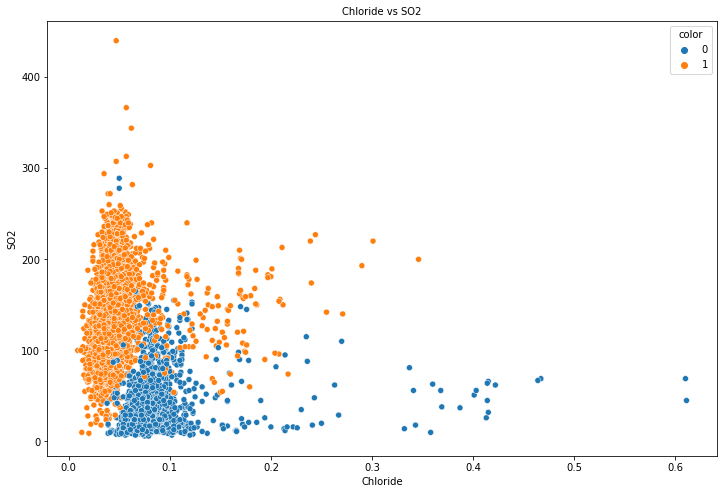

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df2, x=df2['chlorides'], y=df2['total sulfur dioxide'], marker='o', hue=df1['color'])
plt.title('Chloride vs SO2', fontsize=10)
plt.ylabel('SO2')
plt.xlabel('Chloride')
plt.legend(title='color')
plt.show()

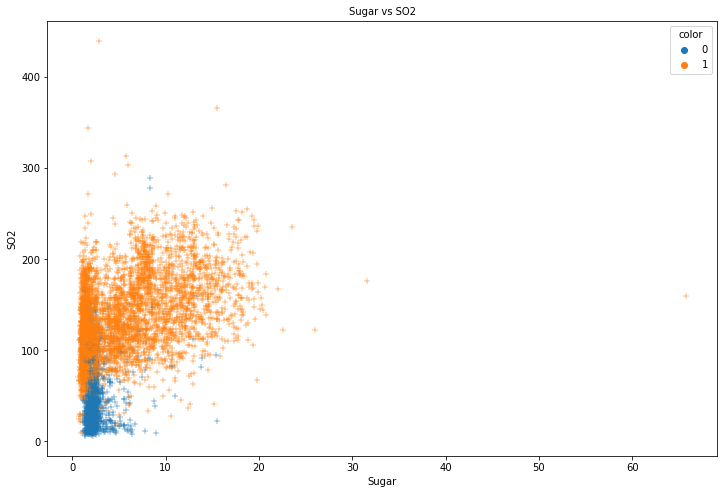

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df2, x=df2['residual sugar'], y=df2['total sulfur dioxide'], marker='+', hue=df1['color'])
plt.title('Sugar vs SO2', fontsize=10)
plt.ylabel('SO2')
plt.xlabel('Sugar')
plt.legend(title='color')
plt.show()

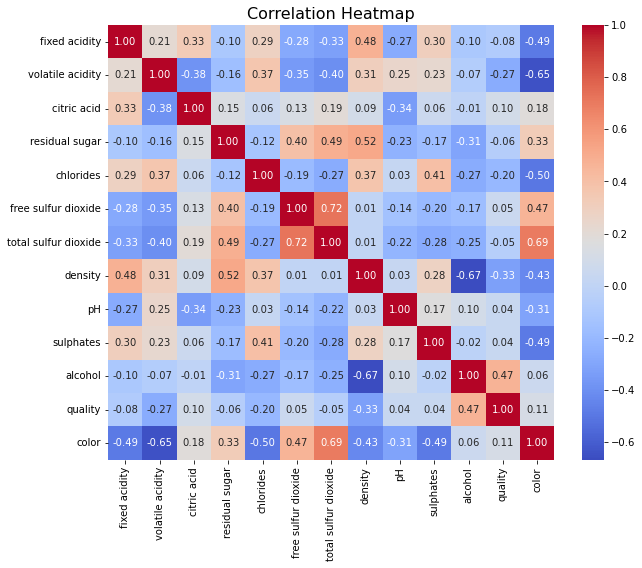

In [13]:
#mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Offensichtlich: Farbe --> positiv korreliert mit total / free sulfur dioxide; negativ korreliert mit chlorides, sulfates und fixed/ volatile acidity

## Modellierung
* Wir suchen nach einer eindeutigen Klassifizierung in Rot- und Weißwein aufgrund der chemischen Eigenschaften
* Binäre Zielvariable: Weinfarbe (rot oder weiß) --> Modell 1 = logistische Regression
* Modell 2 - kNN (Daten zeigen Muster, die sich mit kNN eventuell gut finden lassen)
* Teilen des Datensatzes
* Skalierung der Variablen

In [14]:
# Festlegung für das Modell: X und y
X = df2.iloc[:, 0:11].values
y = df2.iloc[:, 12].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1. Modellierung mit Logistischer Regression
* Modellbildung mit Trainingsdatensatz
* Validierung mit Testdatensatz

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Vorhersage für Testdaten
y_pred = logreg.predict(X_test)

### Bewertung der Modellgüte

In [18]:
from sklearn.metrics import confusion_matrix
cf1=confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,393,11,404
1,7,1185,1192
All,400,1196,1596


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       404
           1       0.99      0.99      0.99      1192

    accuracy                           0.99      1596
   macro avg       0.99      0.98      0.99      1596
weighted avg       0.99      0.99      0.99      1596



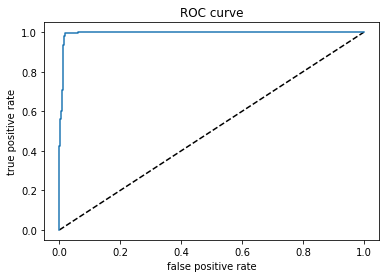

In [20]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

Ergebniszusammenfassung Modell 1

* Bewerung precision, recall, ROC, AUC-ROC
* Wege zur Modellverbesserung
* Fehlereinflüsse

### 2. Modellbildung mit kNN
* Modellbildung mit Trainingsdaten
* Validierung mit Testdaten

In [21]:
weights = 'distance'
n_neighbors = 9
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=9, weights='distance')

* Modell auf Testdaten anwenden
* Bewertung der Modellgüte

In [22]:
y_pred_clf = clf.predict(X_test)

cf2=confusion_matrix(y_test,y_pred_clf)
pd.crosstab(y_test, y_pred_clf, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,395,9,404
1,8,1184,1192
All,403,1193,1596


In [23]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       404
           1       0.99      0.99      0.99      1192

    accuracy                           0.99      1596
   macro avg       0.99      0.99      0.99      1596
weighted avg       0.99      0.99      0.99      1596



Modellzusammenfassung Modell 2

* Bewerung precision, recall, ROC, AUC-ROC
* Wege zur Modellverbesserung
* Fehlereinflüsse

## Modellvergleich
* keine wesentlichen Performance-Unterschiede zwischen LR und kNN
* beide Modelle können mit 99%iger Genauigkeit zwischen Rot- und Weißwein unterscheiden
* Ergebnisse visualisieren

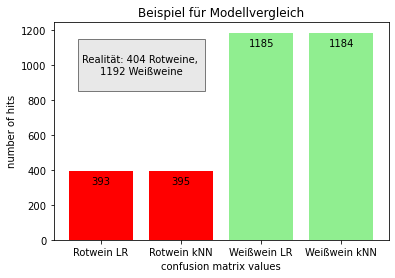

In [22]:
#recall_LR = cf1[0,0]/(cf1[0,0]+cf1[0,1])
recall_LR = cf1[0,0]
recall_kNN = cf2[0,0]
precision_LR = cf1[1,1]
precision_kNN = cf2[1,1]

werte = [recall_LR, recall_kNN,precision_LR, precision_kNN]
farben = ['red', 'red', 'lightgreen', 'lightgreen']
bars = plt.bar(range(len(werte)), werte, color = farben)

kategorien = ['Rotwein LR', 'Rotwein kNN', 'Weißwein LR', 'Weißwein kNN']
plt.xticks(range(len(werte)), kategorien)

for bar, wert in zip(bars, werte):
    plt.annotate(str(wert), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, -15),
                 textcoords='offset points', ha='center', va='bottom', color='black')

textblock = '''
Realität: 404 Rotweine, 
1192 Weißweine
'''
plt.text(0.5, 1000, textblock, ha='center', va='center', bbox=dict(facecolor='lightgray', alpha=0.5))


plt.xlabel('confusion matrix values')
plt.ylabel('number of hits')
plt.title('Beispiel für Modellvergleich')
plt.show()

# Zusammenfassung
* Erkenntnisgewinn der Modellierung
* Fehlereinflüsse und Verbesserungsvorschläge (wenn notwendig!)
* verwendete Quellen (**!!**)